In [2]:
library(magrittr)
library(dplyr)

In [3]:
train_set = read.csv("../data/wk3_kc_house_train_data.csv")
test_set = read.csv("../data/wk3_kc_house_test_data.csv")
validation_set = read.csv("../data/wk3_kc_house_valid_data.csv")

In [74]:
train_set = train_set[order(train_set$sqft_living),]
test_set = test_set[order(test_set$sqft_living),]
validation_set = validation_set[order(validation_set$sqft_living),]

In [77]:
polynomial_matrix = function(feature, degree, name="sqft"){
    out = sapply(1:degree, function(i) feature^i)
    colnames(out) = paste0(name, "_", 1:degree)
    out
}

In [81]:
sqft_ploynomials = as.data.frame(cbind(polynomial_matrix(train_set$sqft_living, 6), price=train_set$price))

In [82]:
sqft_ploynomials %>% head

sqft_1 sqft_2   sqft_3      sqft_4       sqft_5       sqft_6  price
1    290  84100 24389000  7072810000 2.051115e+12 5.948233e+14 142000
2    370 136900 50653000 18741610000 6.934396e+12 2.565726e+15 276000
3    384 147456 56623104 21743271936 8.349416e+12 3.206176e+15 265000
4    390 152100 59319000 23134410000 9.022420e+12 3.518744e+15 228000
5    390 152100 59319000 23134410000 9.022420e+12 3.518744e+15 245000
6    420 176400 74088000 31116960000 1.306912e+13 5.489032e+15 229050

In [83]:
# plot(x=sqft_living_ploynomials[, 3], y=train_set$price)
# lines(x=sqft_living_ploynomials[, 2])
# lines(x=sqft_living_ploynomials[, 1])

In [92]:
lin_mod = lm(price ~ poly(sqft_living, 3), train_set)
sq_mod = lm(price ~ sqft_1 + sqft_2, sqft_ploynomials)
cub_mod = lm(price ~ sqft_1 + sqft_2 + sqft_3, sqft_ploynomials)

In [85]:
lin_mod$coefficients
sq_mod$coefficients
cub_mod$coefficients

(Intercept)      sqft_1 
-59493.3172    288.5985

(Intercept)       sqft_1       sqft_2 
2.675063e+05 1.226738e+00 5.229490e-02

(Intercept)       sqft_1       sqft_2       sqft_3 
2.621706e+05 7.502921e+00 5.030636e-02 1.670907e-07

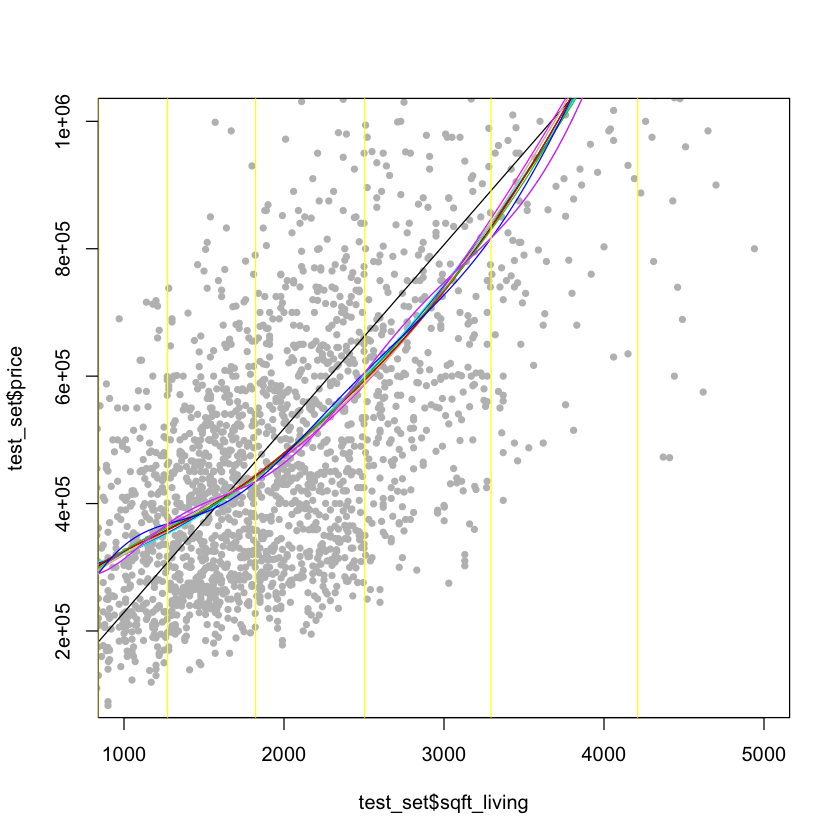

In [147]:
plot(x=test_set$sqft_living, y=test_set$price, pch=20, col="gray", ylim=c(1e5,1e6), xlim=c(1000,5000))
for(n in 1:15){
    mod = lm(price ~ poly(sqft_living, n), train_set)
    lines(x=test_set$sqft_living, y=predict(mod, test_set), col=n)
}

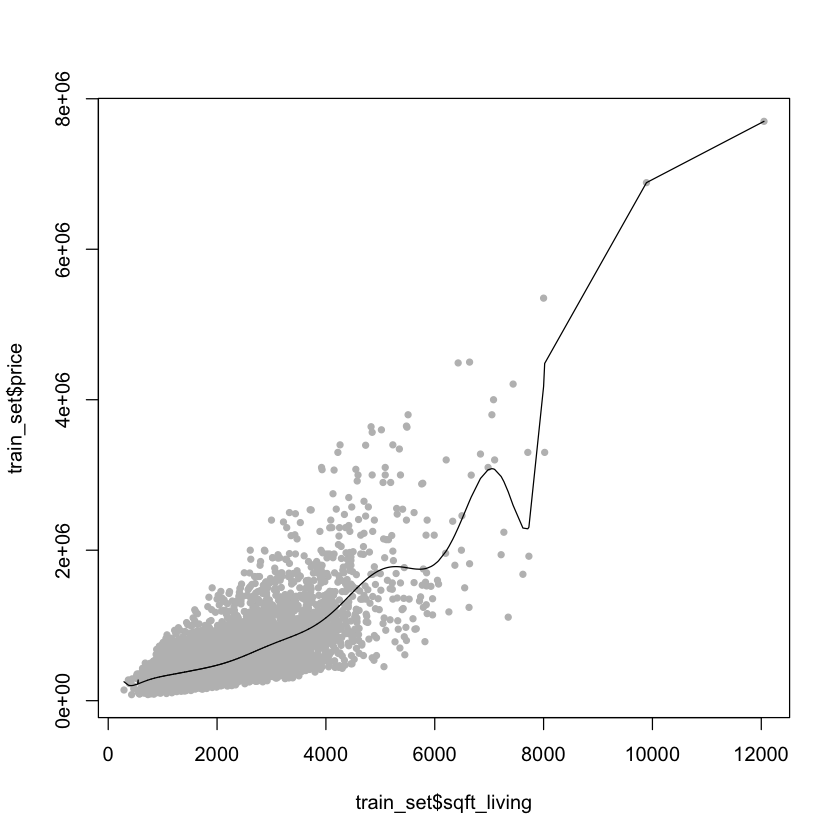

In [116]:
mod = lm(price ~ poly(sqft_living, 15), train_set)

plot(x=train_set$sqft_living, y=train_set$price, pch=20, col="gray")
points(x=train_set$sqft_living, y=predict(mod), type="l")

In [122]:
data_set1 = read.csv("../data/wk3_kc_house_set_1_data.csv")
data_set2 = read.csv("../data/wk3_kc_house_set_2_data.csv")
data_set3 = read.csv("../data/wk3_kc_house_set_3_data.csv")
data_set4 = read.csv("../data/wk3_kc_house_set_4_data.csv")

In [123]:
lm(price ~ poly(sqft_living, 15), data_set1)$coefficients[15]
lm(price ~ poly(sqft_living, 15), data_set2)$coefficients[15]
lm(price ~ poly(sqft_living, 15), data_set3)$coefficients[15]
lm(price ~ poly(sqft_living, 15), data_set4)$coefficients[15]

ERROR: Error in poly(sqft_living, 15): 'degree' must be less than number of unique points


poly(sqft_living, 15)14 
              -96781.69

poly(sqft_living, 15)14 
              -17612.76

poly(sqft_living, 15)14 
              -112661.1

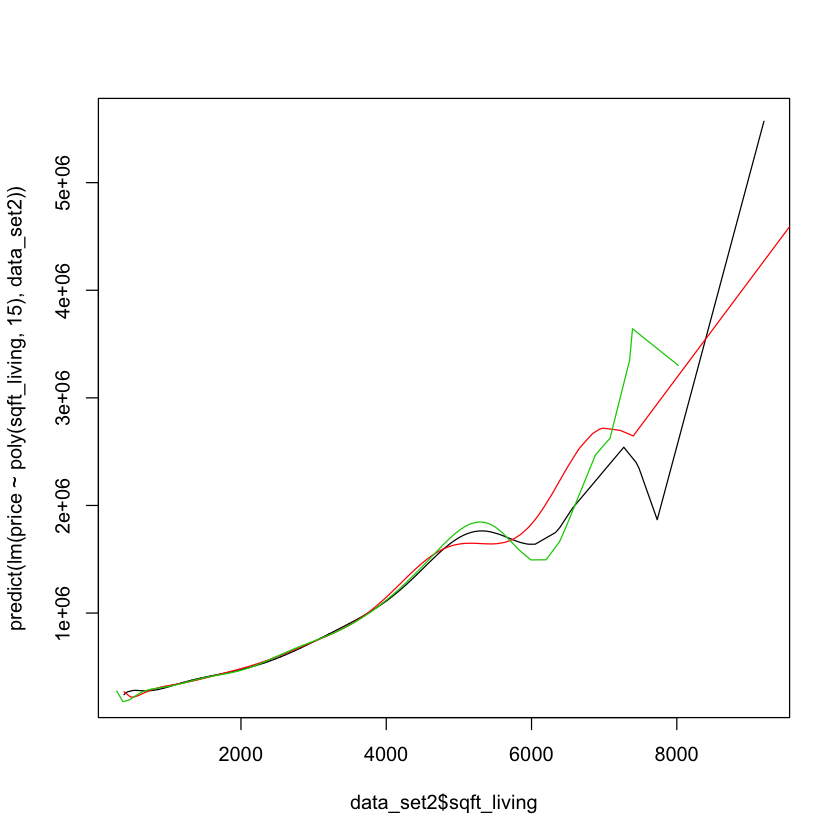

In [126]:
plot(x=data_set2$sqft_living, y=predict(lm(price ~ poly(sqft_living, 15), data_set2)), type="l")
points(x=data_set3$sqft_living, y=predict(lm(price ~ poly(sqft_living, 15), data_set3)), type="l", col=2)
points(x=data_set4$sqft_living, y=predict(lm(price ~ poly(sqft_living, 15), data_set4)), type="l", col=3)

In [140]:
models = lapply(1:15, function(n) lm(price ~ poly(sqft_living, n), train_set))
n_best = sapply(models, function(m) sum(predict(m, validation_set)-validation_set$price)^2) %>% which.min
model = models[[n_best]]

In [143]:
model$coefficients

(Intercept) poly(sqft_living, n)1 poly(sqft_living, n)2 
             542735.0            26435630.8             9450840.2 
poly(sqft_living, n)3 poly(sqft_living, n)4 poly(sqft_living, n)5 
             106262.0              180276.6             -195959.7 
poly(sqft_living, n)6 
           -1926120.4

In [145]:
sum((predict(model, test_set)-test_set$price)^2) %>% format

[1] "1.333836e+14"